In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("merged_mood_data.csv")


# DATA SPLIT

In [2]:
x = df[["Duration (Hours)", "Adjusted Stress Level", "Calories Burned"]]
y= df [["Mood Score"]]

# Data split (80% for learning, 20% for evaluating performance and accuracy)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) #random state, how many times it shuffles the df

print("Training data: ", x_train.shape)
print("Test data: ", x_test.shape)


Training data:  (24, 3)
Test data:  (7, 3)


## LINEAR REGRESSION MODEL TRAINING

In [3]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

## Model performance test

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Make a prediction
y_pred = model.predict(x_test)

# test accuracy
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")

MAE: 0.44
MSE: 0.26
R^2: 0.75


## Using the model to predict

In [5]:
example_input = [[6, 5, 300]] #sleep hs, stress lvl, calories burn

predicted_mood = model.predict(example_input)
predicted_mood = float(predicted_mood[0])

print(f"Prediction: {predicted_mood:.2f}")

Prediction: 5.22


c:\Users\hsueh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\hsueh\AppData\Local\Temp\ipykernel_31436\3077596794.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_mood = float(predicted_mood[0])


Which Factor affects mood the most?

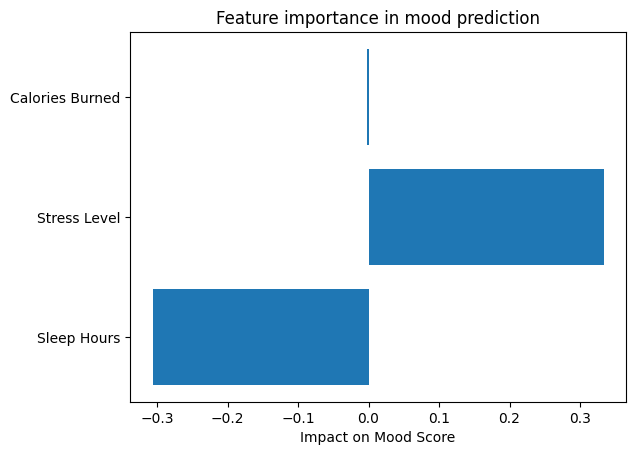

In [6]:
import matplotlib.pyplot as plt

feature_importance = model.coef_.flatten()

features = ["Sleep Hours", "Stress Level", "Calories Burned"]
 
plt.barh(features, feature_importance)
plt.xlabel("Impact on Mood Score")
plt.title("Feature importance in mood prediction")
plt.show()

Sleep Hours (-0.3)
Negative impact means more sleep -> lower mood score (better mood).
If you sleep more, your predicted mood score decreases (meaning less stress).

Stress Level (+0.3)
Positive impact means higher stress -> higher mood score (worse mood).
If stress increases, your mood score increases (meaning more stress).

Calories Burned (Near 0)
Almost no impact on mood prediction.
Calories burned during exercise don't significantly affect mood in the model.

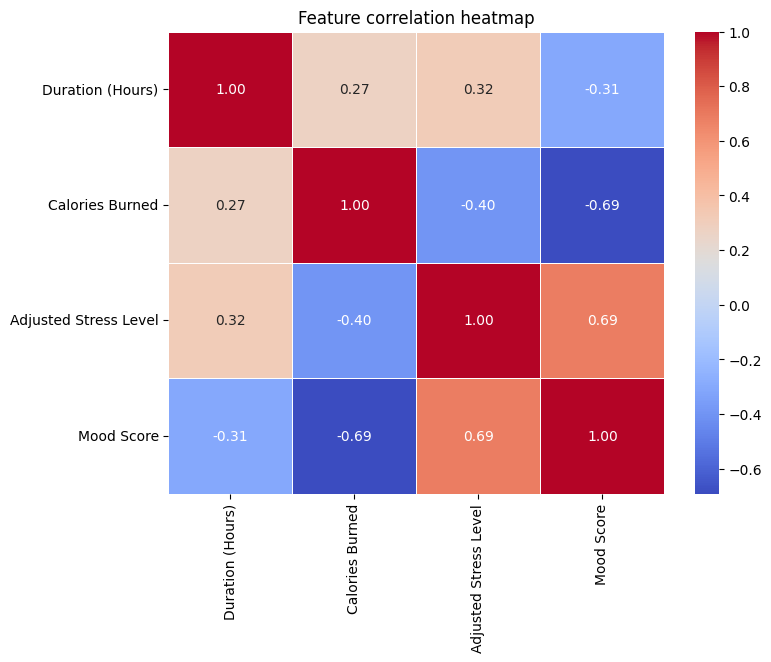

In [7]:
import seaborn as sns


df_numeric = df.select_dtypes(include=["number"])

#correlation matrix
correlation_matrix = df_numeric.corr()


#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature correlation heatmap")
plt.show()

Sleep Duration vs. Mood Score (-0.31)
A negative correlation means that more sleep is slightly associated with a better mood (lower mood score).
The effect is weak, meaning other factors may also be important.


Calories Burned vs. Mood Score (-0.69)
Strong negative correlation: Burning more calories is strongly associated with a better mood.
This suggests that exercise may play a major role in improving mood.


Adjusted Stress Level vs. Mood Score (0.69)
Strong positive correlation: Higher stress levels are strongly linked with worse mood.
This confirms that stress significantly impacts mood.


Calories Burned vs. Adjusted Stress Level (-0.40)
Moderate negative correlation: More exercise tends to lower stress.
This means that people who exercise more may experience less stress.



Stress Level has the strongest influence on mood (positive correlation).
Exercise (Calories Burned) is highly beneficial for mood improvement and stress reduction.
Sleep Duration has a mild impact, meaning that while sleep is important, it's not the dominant factor affecting mood.

Multicollinearity problem, contradiction of exercising. since stress already explains most of the mood variations, exercise doesnt add much extra value in prediction.

In [8]:
import joblib  # Library to save models

# Save the trained model
joblib.dump(model, "mood_predictor.pkl")


['mood_predictor.pkl']